# Ecuaciones Diferenciales Ordinarias

Una ecuación diferencial es una ecuación que expresa la relación entre una función y sus derivadas.

Cuando la función $f(x)$ depende únicamente de una variable $x \in \mathbb R$ definida en una dimensión, entonces la ecuación se dice **ordinaria**.

$$F\left(x, f(x), \frac{df(x)}{dx}, \frac{d^2f(x)}{dx^2}, \frac{d^3f(x)}{dx^3}, \ldots, \frac{d^{n-1}f(x)}{dx^{n-1}}\right) = \frac{d^{n}f(x)}{dx^{n}}$$

Donde $n$ es el orden de la EDO.

## EDO de primer orden

Por ejemplo, supongamos que contamos con la siguiente EDO:

$$\frac{df(t)}{dt} = e^{-t}$$

con valor inicial $f(0)=-1$

Esta ecuación tiene solución analítica $f(t)=- e^{-t}$, sin embargo para efectos de demostración vamos a utilizar el método de Euler para resolver la EDO. 

$$f(t_{j+1}) = f(t_j) + h F(t_j,f(t_j))$$

Donde $h$ es el tamaño del intervalo.

In [2]:
function euler(F::Function, tspan::Tuple{Float64,Float64}, y0::Float64, h::Float64)
    t_out = tspan[1]:h:tspan[2]
    y_out = zeros(length(t_out))
    y_out[1]=y0	
	for i=1:length(y_out)-1
		y_out[i+1]= y_out[i] + h*F(t_out[i], y_out[i])
	end
    return (t_out, y_out)
end


F(t,s)=exp(-t);



In [13]:
tspan=(0.0,1.1);
h=0.01;
y0=-1.0;
t_out,y_out=euler(F,tspan,y0,h);

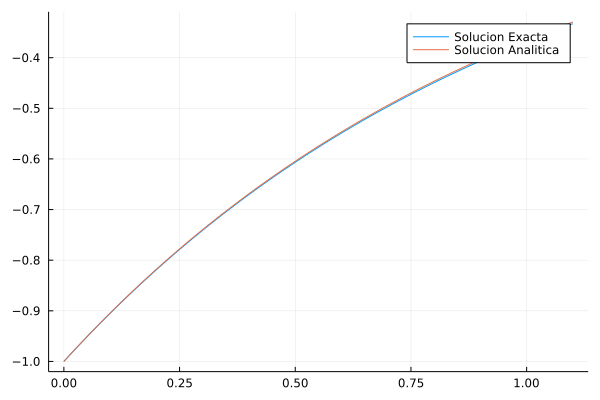

In [14]:
using Plots

y_exact(t)=-exp(-t)

plot(t_out,y_exact.(t_out),label="Solucion Exacta")
plot!(t_out,y_out,label="Solucion Analitica")


In [15]:
using DataFrames

sol_exacta=y_exact.(t_out)
error=abs.(sol_exacta-y_out)
df= DataFrame(t=t_out,analitica=sol_exacta,numerica=y_out,error=error)

,t,analitica,numerica,error
,Float64,Float64,Float64,Float64
1,0.0,-1.0,-1.0,0.0
2,0.01,-0.99005,-0.99,4.98337e-5
3,0.02,-0.980199,-0.9801,9.91716e-5
4,0.03,-0.970446,-0.970298,0.000148019
5,0.04,-0.960789,-0.960593,0.00019638
6,0.05,-0.951229,-0.950985,0.000244259
7,0.06,-0.941765,-0.941473,0.000291663
8,0.07,-0.932394,-0.932055,0.000338594
9,0.08,-0.923116,-0.922731,0.000385059


In [16]:
df[end,:]

,t,analitica,numerica,error
,Float64,Float64,Float64,Float64
111,1.1,-0.332871,-0.32953,0.0033412


In [10]:
using DifferentialEquations

f(u,p,t) = exp(-t)
u0 = -1.0
tspan = (0.0,1.1);
prob = ODEProblem(f,u0,tspan);

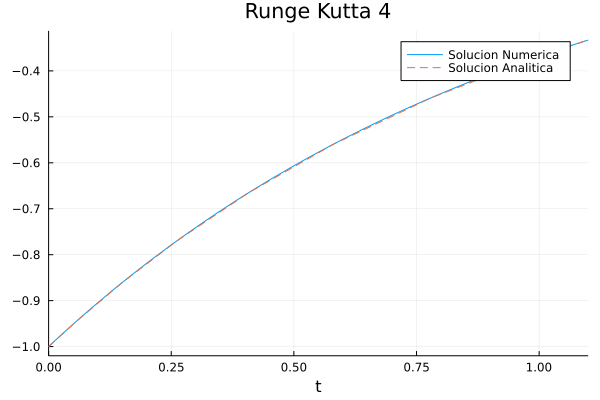

In [11]:
sol = solve(prob,RK4())

plot(sol,label="Solucion Numerica",title="Runge Kutta 4") # legend=false
plot!(sol.t,t->-exp(-t),ls=:dash,label="Solucion Analitica")

In [12]:
sol_exacta=y_exact.(sol.t)
error=abs.(sol_exacta-sol.u)
df= DataFrame(t=sol.t,analitica=sol_exacta,numerica=sol.u,error=error)

,t,analitica,numerica,error
,Float64,Float64,Float64,Float64
1,0.0,-1.0,-1.0,0.0
2,0.0562482,-0.945304,-0.945304,1.90087e-10
3,0.148579,-0.861932,-0.861932,2.29339e-9
4,0.261656,-0.769775,-0.769775,7.52309e-9
5,0.408175,-0.664863,-0.664863,2.43004e-8
6,0.580185,-0.559795,-0.559795,5.62094e-8
7,0.780483,-0.458185,-0.458185,1.12929e-7
8,1.00427,-0.366313,-0.366313,1.92813e-7
9,1.1,-0.332871,-0.332871,1.93788e-7


# 2. Ecuaciones Diferenciales de 2do Orden

La ecuación diferencial para un pendulo de largo $l$ y masa $m$ es:

$$ml\frac{d^2\Theta(t)}{dt^2} = -mg \sin(\Theta(t)).$$

Si el angulo $\Theta \approx \sin(\Theta)$ es pequeño, podemos hacer la siguiente aproximación:

$$l\frac{d^2\Theta(t)}{dt^2} = -g\Theta(t)$$

In [80]:
# Constants
const g = 9.81;
const L = 1.0;

#Initial Conditions
u₀ = [0,π/2];
tspan = (0.0,6.3);

#Define the problem
function simplependulum(du,u,p,t)
    θ  = u[1]
    dθ = u[2]
    du[1] = dθ
    du[2] = -(g/L)*sin(θ)
end

#Pass to solvers
prob = ODEProblem(simplependulum,u₀, tspan);
sol = solve(prob,RK4());

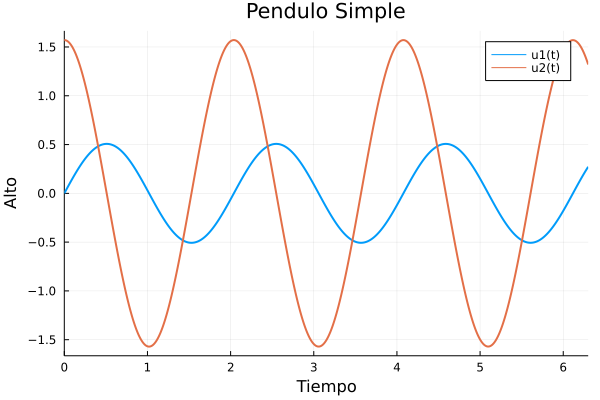

In [81]:
plot(sol,linewidth=2,
     title ="Pendulo Simple", 
     xaxis = "Tiempo", 
     yaxis = "Alto")

In [82]:
u=reduce(hcat,sol.u)'
df_pendulo= DataFrame(t=sol.t,theta=u[:,1],dtheta=u[:,2])

,t,theta,dtheta
,Float64,Float64,Float64
1,0.0,0.0,1.5708
2,0.000636215,0.000999363,1.57079
3,0.00699836,0.0109921,1.57042
4,0.0275322,0.0431938,1.56496
5,0.0566177,0.0884696,1.54618
6,0.0937586,0.14517,1.50367
7,0.139873,0.212767,1.42302
8,0.194517,0.287072,1.29015
9,0.257931,0.362805,1.09098


# Tarea

1.) Encuentre la solución numerica para el pendulo para angulos pequeños usando Runge Kutta.

2.) Compruebe los valores con el método general.

3.) Utilice el valor inicial $u₀=\pi$ y compruebe los resultados.

In [83]:
#Define the problem
function simplependulum_small(du,u,p,t)
    θ  = u[1]
    dθ = u[2]
    du[1] = dθ
    du[2] = -(g/L)*θ
end

#Pass to solvers
prob2 = ODEProblem(simplependulum_small,u₀, tspan);
sol2 = solve(prob2,RK4());

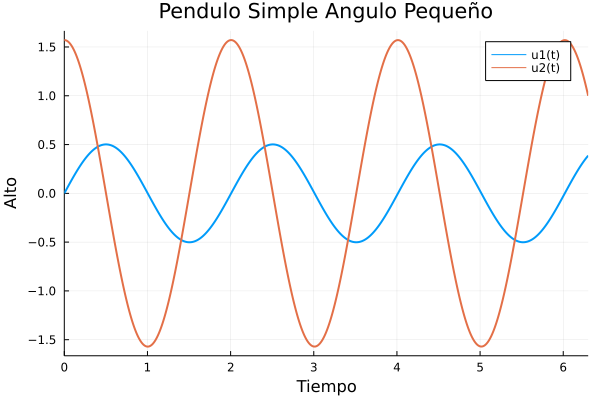

In [84]:
plot(sol2,linewidth=2,
     title ="Pendulo Simple Angulo Pequeño", 
     xaxis = "Tiempo", 
     yaxis = "Alto")

In [85]:
u2=reduce(hcat,sol2.u)'
df_pendulo_small= DataFrame(t=sol2.t,theta=u2[:,1],dtheta=u2[:,2])

,t,theta,dtheta
,Float64,Float64,Float64
1,0.0,0.0,1.5708
2,0.000636215,0.000999363,1.57079
3,0.00699836,0.0109921,1.57042
4,0.0280873,0.0440626,1.56472
5,0.058234,0.0909674,1.54474
6,0.0967105,0.1496,1.49928
7,0.144508,0.219322,1.41263
8,0.200837,0.295076,1.27014
9,0.265564,0.370681,1.05804


In [86]:
df_pendulo_small[end,:]

,t,theta,dtheta
,Float64,Float64,Float64
67,6.3,0.386562,0.999402


In [87]:
df_pendulo[end,:]

,t,theta,dtheta
,Float64,Float64,Float64
65,6.3,0.272065,1.32024


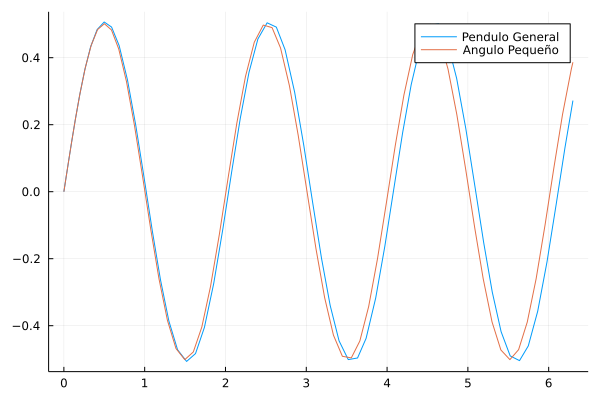

In [88]:
plot(df_pendulo[!,"t"],df_pendulo[!,"theta"],label="Pendulo General")
plot!(df_pendulo_small[!,"t"],df_pendulo_small[!,"theta"],label="Angulo Pequeño")

In [89]:
y_exact(t)=u₀[2]*cos(sqrt(g/L)*t)

y_exact (generic function with 1 method)

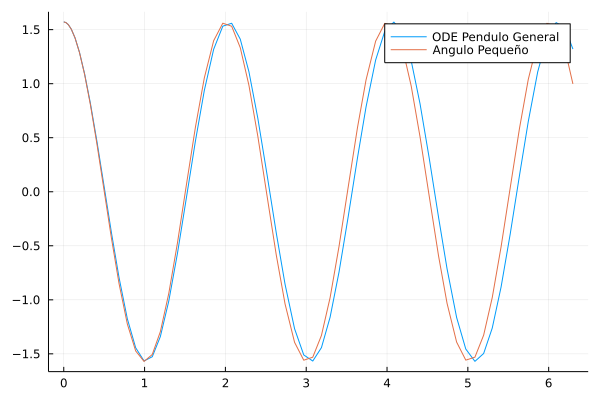

In [98]:
plot(df_pendulo[!,"t"],df_pendulo[!,"dtheta"],label="ODE Pendulo General")
plot!(df_pendulo[!,"t"],y_exact.(df_pendulo[!,"t"]),label="Angulo Pequeño")

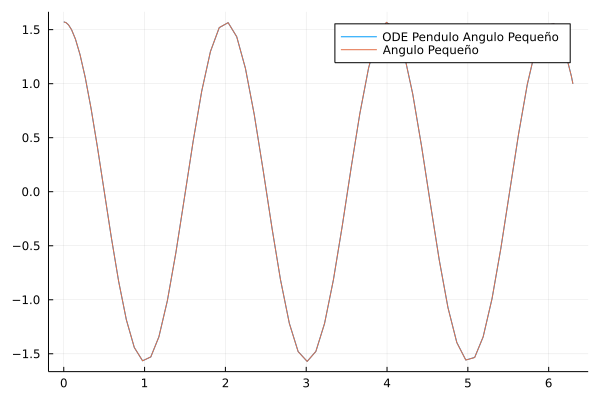

In [99]:
plot(df_pendulo_small[!,"t"],df_pendulo_small[!,"dtheta"],label="ODE Pendulo Angulo Pequeño")
plot!(df_pendulo_small[!,"t"],y_exact.(df_pendulo_small[!,"t"]),label="Angulo Pequeño")